# Desafio de Ciência de Dados

**Autor**: Antonio Duarte Marcos Junior

# 2. Hipóteses de negócio

## 2.1 Importação de bibliotecas e leitura de dados

In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./dados/cars_train_v2.csv')

## 2.2 Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

Considerando que a maioria dos carros populares no Brasil é de motor 1.0 será feita a filtragem para coletar apenas carros com este tipo de motor.

In [2]:
df_carros_pop = df.query('motor == "1.0"')

Distribuição das principais marcas de modelos populares no Brasil.

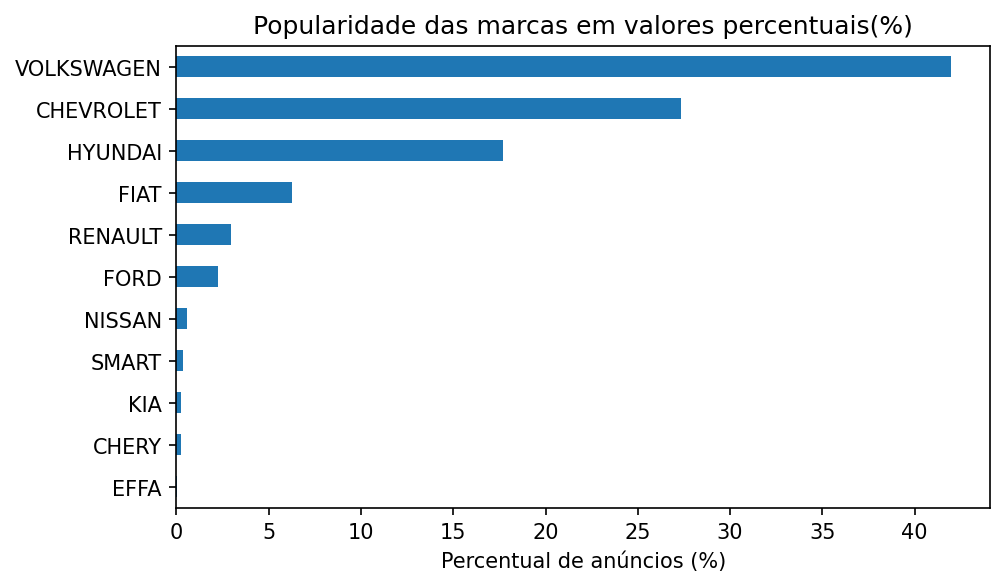

In [3]:
fig, ax = plt.subplots(1, 
                       figsize=(7, 4), 
                       dpi=150)

(100 * df_carros_pop['marca']\
                    .value_counts(normalize=True, ascending=True))\
                    .plot(kind='barh', ax=ax)

ax.set_title('Popularidade das marcas em valores percentuais(%)')
ax.set_xlabel('Percentual de anúncios (%)')
plt.show()

Portanto, as três principais marcas do segmento de carros populares no Brasil são: Volkswagen, Chevrolet e Hyundai.

Preços médios dos carros populares por estado.

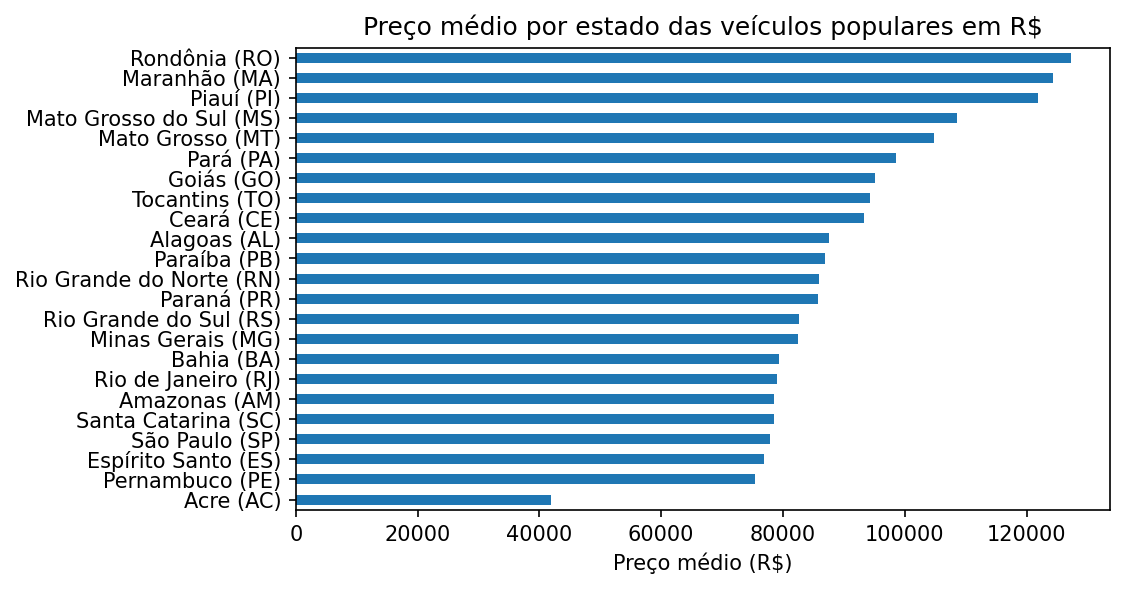

In [4]:
fig, ax = plt.subplots(1, figsize=(7, 4), dpi=150)

df_carros_pop.groupby(['estado_vendedor'])['preco']\
             .mean()\
             .sort_values()\
             .plot(kind='barh', ax=ax)
ax.set_title('Preço médio por estado das veículos populares em R$')
ax.set_ylabel('')
ax.set_xlabel('Preço médio (R$)')
plt.show()

Esta primeira análise apresenta o estado de Rondônia como tendo o maior preço médio. Portanto, poderia-se pensar que seria um bom estado para se anunciar um veículo popular, já que teria o preço médio mais elevado. Entretanto é preciso atentar para a quantidade de anúncios.

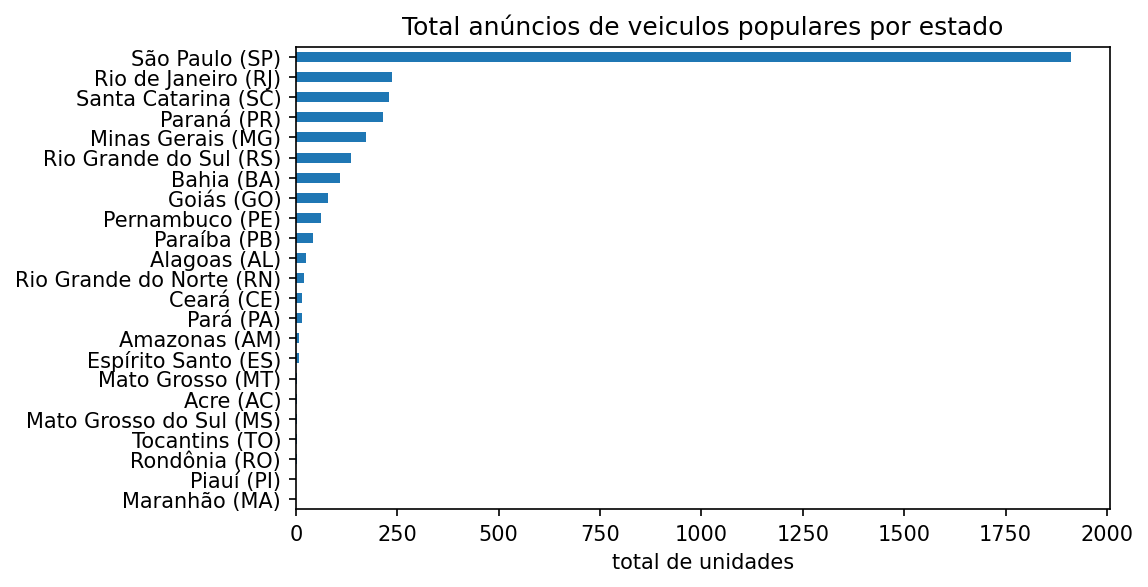

In [5]:
fig, ax = plt.subplots(1, figsize=(7, 4), dpi=150)

df_carros_pop['estado_vendedor'].value_counts(ascending=True)\
             .plot(kind='barh', ax=ax)
ax.set_title('Total anúncios de veiculos populares por estado')
ax.set_ylabel('')
ax.set_xlabel('total de unidades')
plt.show()

In [6]:
df_carros_pop['estado_vendedor'].value_counts()

São Paulo (SP)              1911
Rio de Janeiro (RJ)          236
Santa Catarina (SC)          229
Paraná (PR)                  214
Minas Gerais (MG)            174
Rio Grande do Sul (RS)       137
Bahia (BA)                   109
Goiás (GO)                    80
Pernambuco (PE)               61
Paraíba (PB)                  42
Alagoas (AL)                  24
Rio Grande do Norte (RN)      21
Pará (PA)                     14
Ceará (CE)                    14
Amazonas (AM)                  9
Espírito Santo (ES)            7
Mato Grosso (MT)               4
Acre (AC)                      4
Mato Grosso do Sul (MS)        3
Tocantins (TO)                 3
Rondônia (RO)                  2
Maranhão (MA)                  1
Piauí (PI)                     1
Name: estado_vendedor, dtype: int64

Os resultados anteriores mostram que poucos estados concentram a maioria dos anúncios. Rondônia contém apenas dois veículos populares anunciados. Um estado com tão poucos anúncios acaba não sendo representativo para se ter uma média válida.

Assim, para se ter uma melhor representatividade do preço médio por estado serão considerados apenas os estados com pelo menos 100 veículos anunciados.

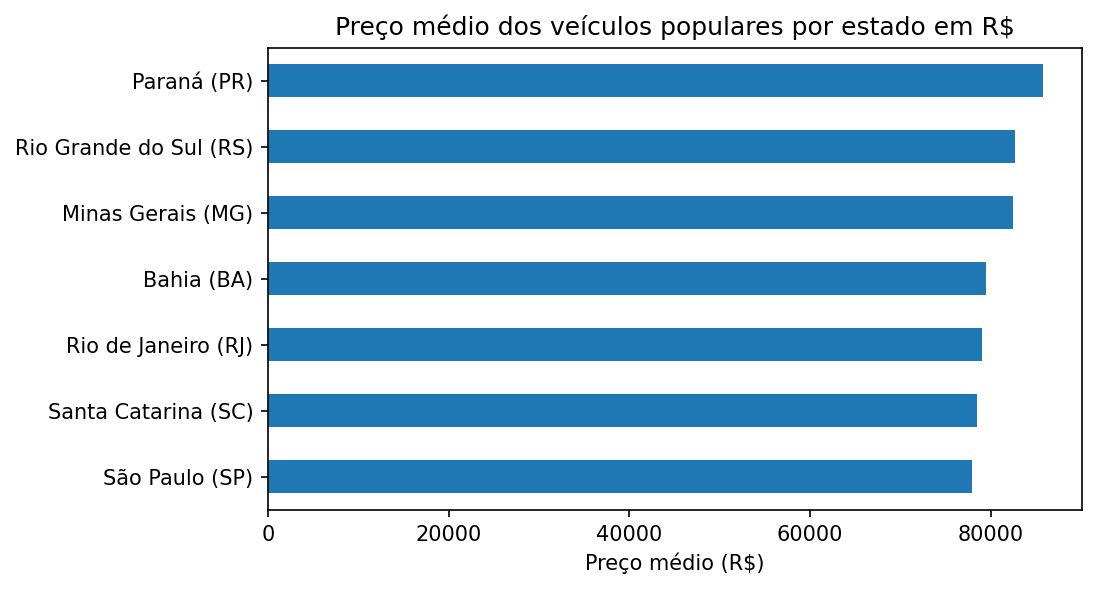

In [7]:
# Lista de estados com pelo menos 100 anúncios de veículos populares
estados_representativos = ['São Paulo (SP)', 'Rio de Janeiro (RJ)',
                           'Santa Catarina (SC)',  'Paraná (PR)',
                           'Minas Gerais (MG)', 'Rio Grande do Sul (RS)',
                           'Bahia (BA)']

fig, ax = plt.subplots(1, figsize=(7, 4), dpi=150)

df_carros_pop.query(f'estado_vendedor in {estados_representativos}')\
             .groupby(['estado_vendedor'])['preco']\
             .mean()\
             .sort_values()\
             .plot(kind='barh', ax=ax)
ax.set_title('Preço médio dos veículos populares por estado em R$')
ax.set_ylabel('')
ax.set_xlabel('Preço médio (R$)');

Considerando que o estado mais atrativo para se vender um veículo é aquele que têm o maior preço médio de revenda. O melhor estado para revenda é: Paraná com média de R$ 85.777,94.

## 2.3 Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

O melhor estado para se comprar uma picape é aquele em que tenha variedade de opção e os menores preços médios.

Contagem dos anúncios de picapes com tramissão automática por estado.

In [8]:
df.query('tipo == "Picape" and cambio != "Manual"')\
  .value_counts('estado_vendedor')


estado_vendedor
São Paulo (SP)              1746
Paraná (PR)                  355
Rio de Janeiro (RJ)          325
Santa Catarina (SC)          286
Minas Gerais (MG)            212
Rio Grande do Sul (RS)       201
Goiás (GO)                   104
Bahia (BA)                    70
Pernambuco (PE)               14
Alagoas (AL)                  12
Acre (AC)                      6
Mato Grosso (MT)               6
Sergipe (SE)                   5
Mato Grosso do Sul (MS)        5
Paraíba (PB)                   4
Piauí (PI)                     4
Tocantins (TO)                 3
Rio Grande do Norte (RN)       1
Ceará (CE)                     1
Amazonas (AM)                  1
dtype: int64

Da mesma forma que a análise anterior serão considerados apenas os estados com pelo menos 100 anúncios.

In [9]:
estados = ['São Paulo (SP)',
           'Paraná (PR)',
           'Rio de Janeiro (RJ)',
           'Santa Catarina (SC)',
           'Minas Gerais (MG)',
           'Rio Grande do Sul (RS)',
           'Goiás (GO)']

picapes = df.query(f'tipo == "Picape" and cambio != "Manual" and estado_vendedor in {estados}')

In [10]:
picapes.groupby('estado_vendedor').preco.describe()

,count,mean,std,min,25%,50%,75%,max
estado_vendedor,,,,,,,,
Goiás (GO),104.0,206211.226170,100799.611618,48500.242827,134484.244428,189347.548465,258277.291167,5.864825e+05
Minas Gerais (MG),212.0,194953.405618,92562.215967,36806.969075,131873.625300,183553.774915,232462.774857,6.531733e+05
Paraná (PR),355.0,197578.692308,90460.347012,33474.730405,128825.029251,190127.176227,253071.335226,5.501470e+05
Rio Grande do Sul (RS),201.0,195266.449017,91973.210014,40222.467536,121496.584281,181941.383430,253566.175141,5.404195e+05
Rio de Janeiro (RJ),325.0,180266.517470,84787.396993,26729.716235,119699.462583,157596.020598,227905.864868,4.868696e+05
Santa Catarina (SC),286.0,186606.995687,114557.048338,41524.669174,122814.502384,165242.570141,227159.027868,1.359813e+06
São Paulo (SP),1746.0,188250.540793,106081.825206,15953.204811,116535.815181,162796.256138,237461.923813,1.154360e+06


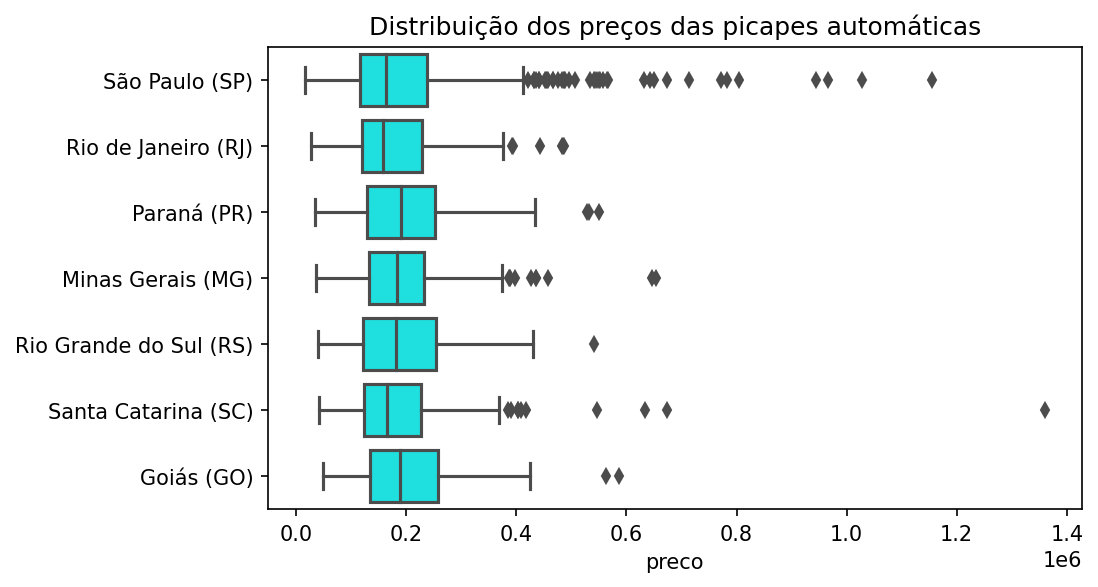

In [11]:
fig, ax = plt.subplots(1, figsize=(7, 4), dpi=150)

sns.boxplot(data=picapes,
            x='preco',
            y='estado_vendedor',
            order=['São Paulo (SP)',
                   'Rio de Janeiro (RJ)',
                   'Paraná (PR)',
                   'Minas Gerais (MG)',
                   'Rio Grande do Sul (RS)',
                   'Santa Catarina (SC)',
                   'Goiás (GO)'
                   ],
            color='cyan',
            ax=ax)
plt.title('Distribuição dos preços das picapes automáticas')
plt.ylabel('')
plt.show()

Considerando a distribuição dos 50% centrais (valores entre o 1º e 3º quartil) o melhor estado para comprar uma picape seria Minas Gerais. Para este estados os 50% centrais têm a menor distância entre si, o que significa que há pouca variabilidade entre os veículos do estado, ao mesmo tempo que são alguns dos menores valores entre os estados. Também não é um estado que apresenta os valores mais elevados e poucos outliers. 

## 2.3 Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

Os mesmos critérios aplicados no item anterior são aplicados a esta questão: boa diversidade de anúncios e menores preços.

Contagem dos anúncios de veículos na garantia de fábrica por estado.

In [12]:
df.query('garantia_de_fábrica == 1')\
  .value_counts('estado_vendedor')

estado_vendedor
São Paulo (SP)              2307
Rio de Janeiro (RJ)          412
Paraná (PR)                  389
Santa Catarina (SC)          330
Rio Grande do Sul (RS)       281
Minas Gerais (MG)            264
Goiás (GO)                   186
Alagoas (AL)                  58
Bahia (BA)                    51
Pernambuco (PE)               20
Pará (PA)                     17
Mato Grosso do Sul (MS)       13
Amazonas (AM)                  9
Espírito Santo (ES)            9
Rio Grande do Norte (RN)       9
Sergipe (SE)                   3
Acre (AC)                      2
Mato Grosso (MT)               2
Paraíba (PB)                   1
Ceará (CE)                     1
Tocantins (TO)                 1
dtype: int64

Seleção dos anúncios em estados com pelo menos 100 veículos na garantia de fábrica.

In [13]:
estados = ['São Paulo (SP)',
           'Rio de Janeiro (RJ)',
           'Paraná (PR)',
           'Santa Catarina (SC)',
           'Rio Grande do Sul (RS)',
           'Minas Gerais (MG)',
           'Goiás (GO)']

garantidos = df.query(f'garantia_de_fábrica == 1 and estado_vendedor in {estados}')

In [14]:
garantidos.groupby('estado_vendedor').preco.describe()

,count,mean,std,min,25%,50%,75%,max
estado_vendedor,,,,,,,,
Goiás (GO),186.0,174521.413156,90809.754431,45812.306967,108223.132151,148835.418103,217907.676027,486648.154645
Minas Gerais (MG),264.0,161206.273890,76856.771415,29906.894268,108118.281423,142744.989022,196591.092493,426790.142244
Paraná (PR),389.0,175578.245503,82210.721670,29328.116594,113655.739280,156357.553200,231069.412129,429236.244325
Rio Grande do Sul (RS),281.0,176442.236455,89532.093833,54742.833352,109996.753706,147604.803119,234130.298885,589418.739087
Rio de Janeiro (RJ),412.0,179109.858403,86161.814458,39556.398656,112548.587834,162092.343056,230807.979556,486869.600468
Santa Catarina (SC),330.0,173798.439853,93082.399439,44004.769748,113430.993034,149273.680372,214900.702670,672933.092917
São Paulo (SP),2307.0,166751.081004,83009.688864,31763.159542,101914.543749,147730.532941,217383.721357,677129.123324


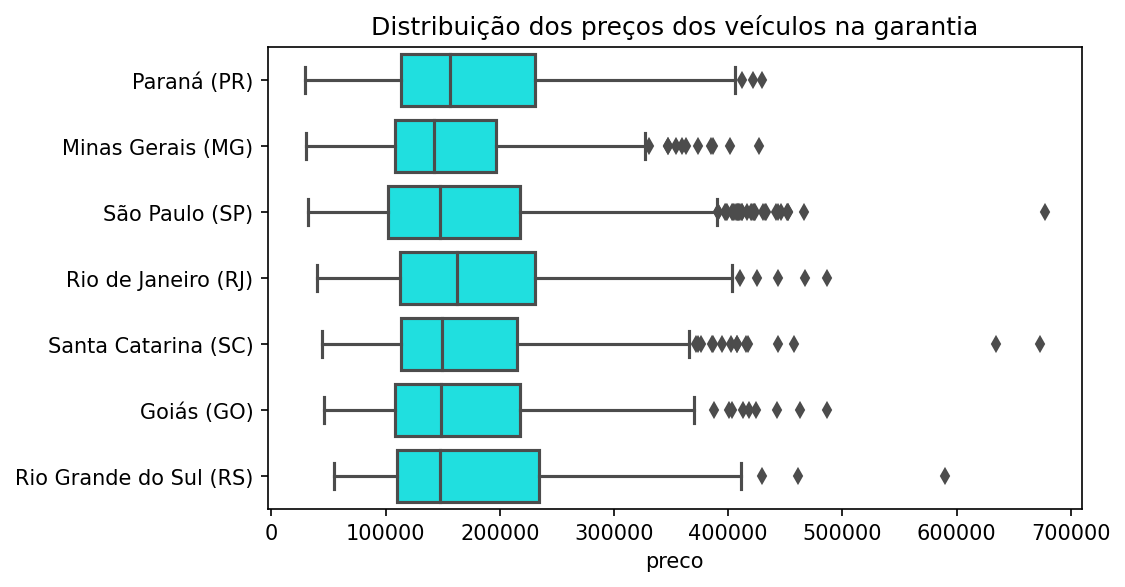

In [15]:
fig, ax = plt.subplots(1, figsize=(7, 4), dpi=150)

sns.boxplot(data=garantidos,
            x='preco',
            y='estado_vendedor',
            order=['Paraná (PR)',
                   'Minas Gerais (MG)',
                   'São Paulo (SP)',
                   'Rio de Janeiro (RJ)',
                   'Santa Catarina (SC)',
                   'Goiás (GO)',
                   'Rio Grande do Sul (RS)',
                   ],
            color='cyan',
            ax=ax)
plt.title('Distribuição dos preços dos veículos na garantia')
plt.ylabel('')
plt.show()

Considerando a distribuição dos 50% centrais (valores entre o 1º e 3º quartil) o melhor estado para comprar um veículo na garantia seria Minas Gerais. Para este estado os 50% centrais têm a menor distância entre si, o que significa que há pouca variabilidade entre os veículos do estado, ao mesmo tempo que são alguns dos menores valores entre os estados. Também não é um estado que apresenta os valores mais elevados e poucos outliers. 

## 2.4 Qual o panorama do mercado de veículos elétricos no Brasil? Principais marcas e preço médio dos veículos. 

Principais marcas de veículos elétricos.

In [16]:
df.query('motor == "elétrico"')\
  .value_counts('marca')

marca
NISSAN       37
PORSCHE      19
AUDI          3
BMW           3
CHEVROLET     3
RENAULT       3
VOLVO         1
dtype: int64

Poucas marcas trazem veículos elétricos para o Brasil. Apenas 69 veículos são anunciados no dataset. Considerando a amostra disponível Nissan e Porsche são as principais marcas do segmento.

Preços médios dos veículos elétricos.

In [17]:
df.query('motor == "elétrico"')\
  .groupby('marca')['preco'].mean().sort_values()

marca
RENAULT      159404.350631
NISSAN       208363.629828
BMW          214157.263756
CHEVROLET    258347.358351
AUDI         264336.236025
VOLVO        290341.398044
PORSCHE      331393.341402
Name: preco, dtype: float64

Renault é a marca com os menores preços médios seguida de Nissan e BMW.

In [18]:
print('Preço médio dos veículos elétricos em R$:',
      df.query('motor == "elétrico"').preco.mean().round(2))

Preço médio dos veículos elétricos em R$: 246159.49


## 2.5 Qual o melhor estado para se comprar um veículo das principais marcas de luxo. 

Como veículo de luxo serão considerados os 5% mais caros.

In [19]:
df_luxo = df.query(f'preco >= {df.preco.quantile(0.95)}')

Distribuição das principais marcas de luxo.

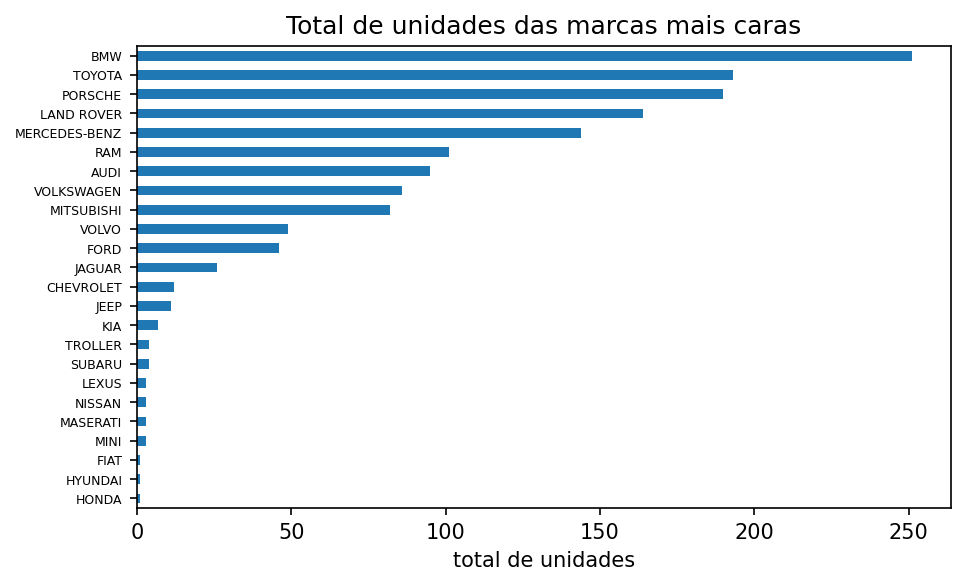

In [20]:
fig, ax = plt.subplots(1, figsize=(7, 4), dpi=150)

df_luxo.marca.value_counts(ascending=True)\
             .plot(kind='barh', ax=ax)
ax.set_title('Total de unidades das marcas mais caras')
ax.set_ylabel('')
ax.set_xlabel('total de unidades')
plt.yticks(fontsize=6)
plt.show()

Percentual de anúncios das 10 principais marcas com veículos de luxo.

In [21]:
df_luxo.marca.value_counts(normalize=True).head(10)*100

BMW              16.959459
TOYOTA           13.040541
PORSCHE          12.837838
LAND ROVER       11.081081
MERCEDES-BENZ     9.729730
RAM               6.824324
AUDI              6.418919
VOLKSWAGEN        5.810811
MITSUBISHI        5.540541
VOLVO             3.310811
Name: marca, dtype: float64

As 5 principais marcas (BMW, Toyota, Porsche, Land Rover e Mercedes-Benz), com veículos de luxo, representam, juntas, quase 64% do total de veículos anunciados nesta categoria.

A próxima análise sera focada nos veículos destas 5 marcas.

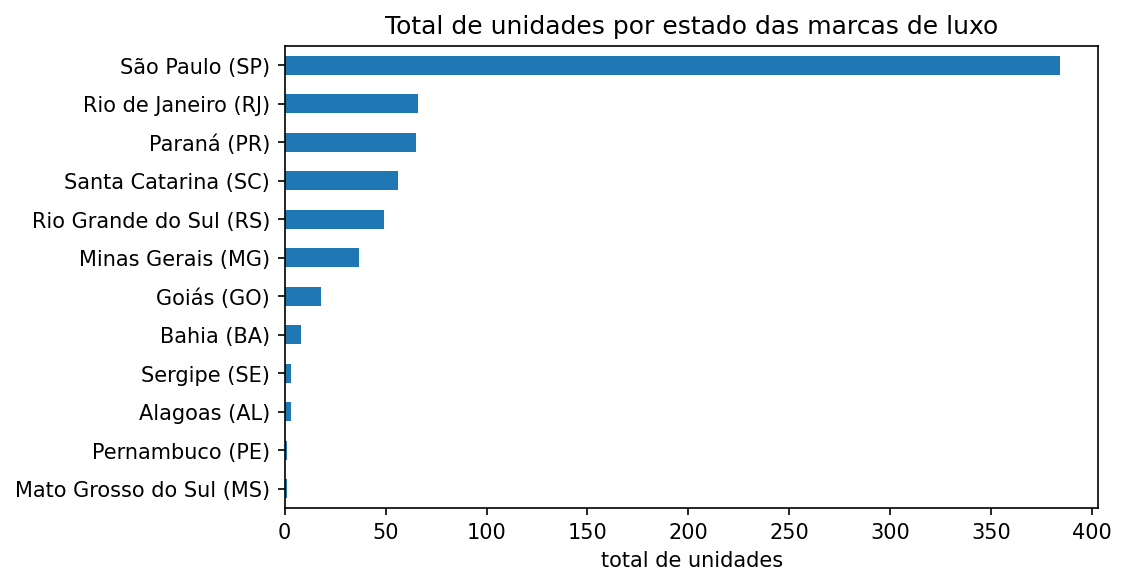

In [22]:
fig, ax = plt.subplots(1, figsize=(7, 4), dpi=150)

principais_marcas = ['MBW', 'TOYOTA', 'PORSCHE', 'LAND ROVER', 'MERCEDES-BENZ']
df_luxo_principais = df_luxo.query(f'marca in {principais_marcas}')

df_luxo_principais.estado_vendedor.value_counts(ascending=True)\
                                  .plot(kind='barh', ax=ax)
ax.set_title('Total de unidades por estado das marcas de luxo')
ax.set_ylabel('')
ax.set_xlabel('total de unidades')
plt.show()

In [23]:
df_luxo_principais.estado_vendedor.value_counts()

São Paulo (SP)             384
Rio de Janeiro (RJ)         66
Paraná (PR)                 65
Santa Catarina (SC)         56
Rio Grande do Sul (RS)      49
Minas Gerais (MG)           37
Goiás (GO)                  18
Bahia (BA)                   8
Alagoas (AL)                 3
Sergipe (SE)                 3
Mato Grosso do Sul (MS)      1
Pernambuco (PE)              1
Name: estado_vendedor, dtype: int64

Apenas 12 estados têm veículos de luxo das marcas selecionadas. Sendo os principais: São Paulo, Rio de Janeiro, Santa Catarina e Rio Grande do Sul. Devido a quantidade de anúncios a avaliação dos preços médios será concentrada nestes estados.

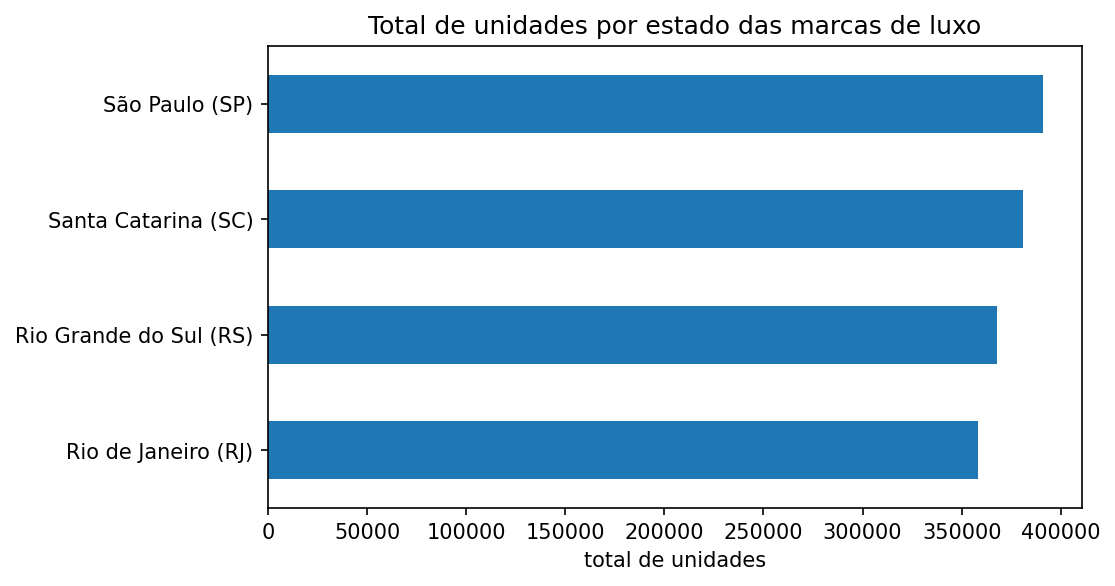

In [24]:
fig, ax = plt.subplots(1, figsize=(7, 4), dpi=150)

principais_estados = ['São Paulo (SP)', 'Rio de Janeiro (RJ)',
                      'Santa Catarina (SC)', 'Rio Grande do Sul (RS)']
df_luxo2 = df_luxo_principais.query(f'estado_vendedor in {principais_estados}')

df_luxo2.groupby('estado_vendedor').preco\
        .mean()\
        .sort_values()\
        .plot(kind='barh', ax=ax)
ax.set_title('Total de unidades por estado das marcas de luxo')
ax.set_ylabel('')
ax.set_xlabel('total de unidades')
plt.show()

In [25]:
df_luxo2.groupby('estado_vendedor').preco\
        .mean()\
        .sort_values()

estado_vendedor
Rio de Janeiro (RJ)       358333.542201
Rio Grande do Sul (RS)    367700.300214
Santa Catarina (SC)       380782.719499
São Paulo (SP)            391000.833681
Name: preco, dtype: float64

Assim, dentre os estados selecionados, o com menor preço médio é o de Rio de Janeiro. Portanto seria um bom estado para se encontrar um veículo de luxo com os melhores preços.

## 2.6 Qual o melhor estado para se anunciar um veículo seminovo flex?

Seleção dos veículos flex e seminovos. Como seminovo foram considerados os veículos com até 3 (três) anos de fabricação.

In [26]:
df_seminovos = df.query('combustivel == "flex" and idade <= 3')

Quantidade de anúncios de seminovos por estado.

In [27]:
df_seminovos.estado_vendedor.value_counts()

São Paulo (SP)              2703
Paraná (PR)                  511
Rio de Janeiro (RJ)          377
Santa Catarina (SC)          333
Minas Gerais (MG)            302
Goiás (GO)                   222
Bahia (BA)                   160
Rio Grande do Sul (RS)       157
Pernambuco (PE)               90
Paraíba (PB)                  57
Alagoas (AL)                  54
Pará (PA)                     51
Amazonas (AM)                 43
Rio Grande do Norte (RN)      32
Mato Grosso (MT)              24
Ceará (CE)                    19
Mato Grosso do Sul (MS)       15
Espírito Santo (ES)           13
Tocantins (TO)                11
Maranhão (MA)                  7
Acre (AC)                      4
Sergipe (SE)                   4
Piauí (PI)                     2
Rondônia (RO)                  1
Name: estado_vendedor, dtype: int64

Da mesma forma que as análises anteriores serão considerados apenas os estados com quantidade significativa de anúncios. Neste caso serão considerados os estados com pelo menos 90 anúncios.

In [28]:
df_seminovos.query(f'estado_vendedor in {estados}')\
            .groupby('estado_vendedor').preco\
            .describe()\
            .sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
estado_vendedor,,,,,,,,
São Paulo (SP),2703.0,111865.665488,46737.999528,29678.386862,77744.582436,104474.861492,137886.130901,430230.489990
Rio de Janeiro (RJ),377.0,113724.838063,48744.195449,27783.457853,78717.111142,107744.653017,138743.255727,317370.705260
Minas Gerais (MG),302.0,118456.299956,42516.269700,38707.852006,87684.096370,117484.416970,144716.915207,312665.868655
Santa Catarina (SC),333.0,122043.138903,56594.016619,32513.935974,86843.652798,111077.647865,144348.529724,457695.010807
Paraná (PR),511.0,122234.212630,49693.891107,30397.168215,85077.555793,118197.145025,148560.847698,397207.201174
Goiás (GO),222.0,125848.101752,52627.262865,45812.306967,90231.575373,123067.275203,148356.520303,462943.628304
Rio Grande do Sul (RS),157.0,127743.263540,47815.711434,50750.757800,96023.092781,120958.355159,148684.749697,338277.296109


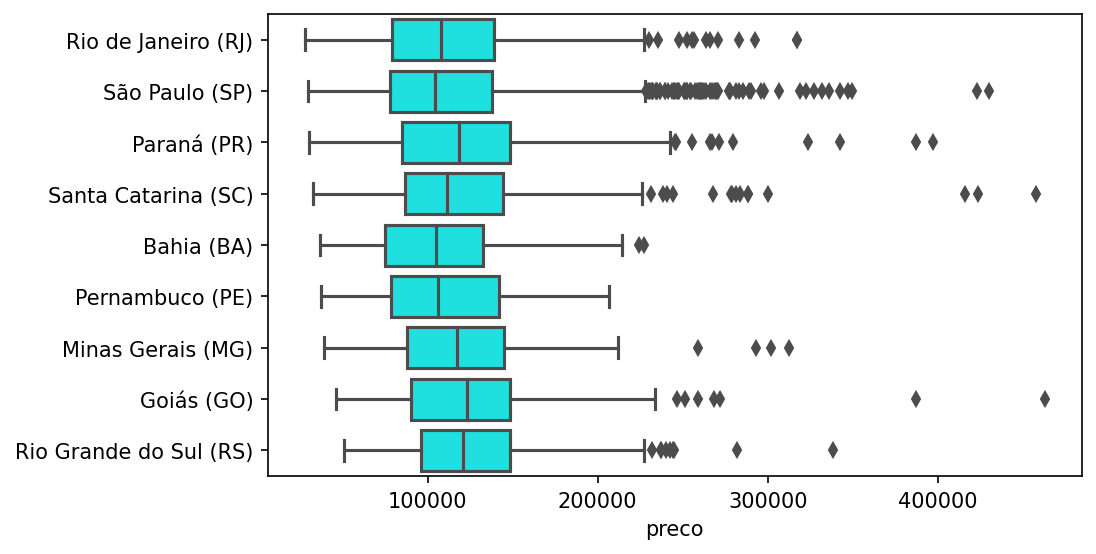

In [29]:
estados = ['São Paulo (SP)',
           'Paraná (PR)',
           'Rio de Janeiro (RJ)',
           'Santa Catarina (SC)',
           'Minas Gerais (MG)',
           'Goiás (GO)',
           'Bahia (BA)',
           'Rio Grande do Sul (RS)',
           'Pernambuco (PE)']
fig, ax = plt.subplots(1, figsize=(7, 4), dpi=150)

sns.boxplot(data=df_seminovos.query(f'estado_vendedor in {estados}'),
            x='preco', 
            y='estado_vendedor',
            order=['Rio de Janeiro (RJ)', 
                   'São Paulo (SP)', 
                   'Paraná (PR)',
                   'Santa Catarina (SC)', 
                   'Bahia (BA)', 
                   'Pernambuco (PE)',
                   'Minas Gerais (MG)', 
                   'Goiás (GO)', 
                   'Rio Grande do Sul (RS)'
                ],
            color='cyan',
            ax=ax)
plt.ylabel('')
plt.show()

Rio Grande do Sul é o estado com os maiores preços médios e mínimos. Sua mediana é a segunda maior. E o valor do seu 3º quartil é também é o maior. O estado do Paraná também apresenta características semelhantes. Considerando tais características estes seriam os melhores estados para se vender um veículo seminovo flex.

## Próxima etapa

A próxima etapa do trabalho é a modelagem do modelo de regressão descrita no arquivo `03_modelagem.ipynb`.